<a href="https://colab.research.google.com/github/saisuresh1999/Sales-Prediction/blob/master/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:

import warnings
warnings.filterwarnings("ignore")

In [0]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [0]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Data Reading

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/saisuresh1999/Sales-Prediction/master/train.csv')
df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Data Wrangling

In [72]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.year.astype('str') + '-' + df['date'].dt.month.astype('str') + '-01'
df['date'] = pd.to_datetime(df['date'])
df = df.groupby('date').sales.sum().reset_index()
#df.head()
df.tail()

,date,sales
55,2017-08-01,1026403
56,2017-09-01,935263
57,2017-10-01,891160
58,2017-11-01,928837
59,2017-12-01,695170


Ploting Monthly Sales

In [18]:
plot_data = [
    go.Scatter(
        x=df['date'],
        y=df['sales'],
    )
]

plot_layout = go.Layout(
        title='Montly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [0]:
X=df[df.columns[1]].values

In [66]:
X=X/1000
X

array([ 454.904,  459.417,  617.382,  682.274,  763.242,  795.597,
        855.922,  766.761,  689.907,  656.587,  692.643,  506.607,
        525.987,  529.117,  704.301,  788.914,  882.877,  906.842,
        989.01 ,  885.596,  785.124,  758.883,  800.783,  578.048,
        552.513,  551.317,  730.951,  824.467,  926.902,  937.184,
       1037.35 ,  920.401,  823.332,  797.253,  827.645,  607.572,
        602.439,  614.957,  790.881,  901.95 ,  988.73 , 1022.664,
       1138.718,  981.494,  896.831,  863.637,  891.448,  663.411,
        617.306,  621.369,  822.667,  938.862, 1020.686, 1064.624,
       1171.393, 1026.403,  935.263,  891.16 ,  928.837,  695.17 ])

In [0]:
size = int(len(X) * 0.66)

In [0]:
train, test = X[0:size], X[size:len(X)]

In [0]:
history = [x for x in train]

In [0]:
predictions = list()

In [71]:
for t in range(len(test)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=764.938828, expected=901.950000
predicted=1085.435737, expected=988.730000
predicted=991.885493, expected=1022.664000
predicted=1059.051866, expected=1138.718000
predicted=1106.337321, expected=981.494000
predicted=883.913533, expected=896.831000
predicted=812.689619, expected=863.637000
predicted=905.710632, expected=891.448000
predicted=812.834233, expected=663.411000
predicted=674.563902, expected=617.306000
predicted=654.930873, expected=621.369000
predicted=695.799460, expected=822.667000
predicted=814.744599, expected=938.862000
predicted=1113.952202, expected=1020.686000
predicted=1034.302761, expected=1064.624000
predicted=1120.427007, expected=1171.393000
predicted=1119.508665, expected=1026.403000
predicted=915.538168, expected=935.263000
predicted=856.170693, expected=891.160000
predicted=926.252939, expected=928.837000
predicted=859.536928, expected=695.170000


Test MSE: 7701.103


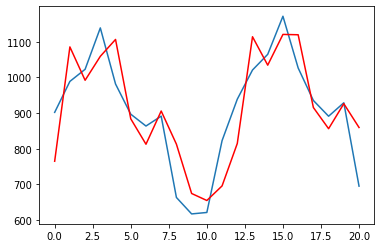

In [73]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()